In [ ]:
pip install quantstats

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import quantstats as qs
import warnings
warnings.simplefilter(action="ignore", category=UserWarning)  # ignoruje wszystkie ostrzeżenia typu UserWarning

# Exercise 6.1

* Load previously saved data with positions and PnL 
* Calculate the gross and net SR for a strategy based on a single moving average (SMA or EMA)
* Calculate and plot the maximum drawdown on the chart

In [8]:
dataUSA_KO_PEP = pd.read_parquet("dataUSA_KO_PEP_after_HW6.parquet")

dataUSA_KO_PEP.head()

,close_KO,close_PEP,close_KO_SMA20,close_KO_EMA20,close_KO_Median20,close_KO_Median40,close_KO_MedAD60,close_KO_MedAD20,position1_mom,pnl_gross1_mom,...,upper_entry,lower_entry,upper_exit,lower_exit,position_dvb,pnl_gross_dvb,ntrans_dvb,pnl_net_dvb,cum_pnl_gross_dvb,cum_pnl_net_dvb
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-01-02 09:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN
2025-01-02 09:32:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2025-01-02 09:33:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2025-01-02 09:34:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2025-01-02 09:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
def mySR(x, scale):
    return np.sqrt(scale) * np.nanmean(x) / np.nanstd(x)

In [10]:
TradingMinsInDay = (6.5 * 60 - 2 * 10)

In [ ]:
mySR(x = dataUSA_KO_PEP['pnl_gross1_mom'],
     scale = 252 * TradingMinsInDay)

np.float64(-0.48989774170580186)

In [12]:
mySR(dataUSA_KO_PEP['pnl_net1_mom'],
     scale = 252 * TradingMinsInDay)

np.float64(-109.9048737830635)

In [38]:
dataUSA_KO_PEP['pnl_gross1_mom_pct'] = (
    dataUSA_KO_PEP['pnl_gross1_mom'] /
    dataUSA_KO_PEP['close_KO'].shift(1))
dataUSA_KO_PEP['pnl_gross2b_mom_pct'] = (
    dataUSA_KO_PEP['pnl_gross2b_mom'] /
    dataUSA_KO_PEP['close_KO'].shift(1))
dataUSA_KO_PEP['pnl_gross_vb_pct'] = (
    dataUSA_KO_PEP['pnl_gross_vb'] /
    dataUSA_KO_PEP['close_KO'].shift(1))

In [39]:
summary_AAPL_daily = (
    dataUSA_KO_PEP.resample('D') # split by days
    # and aggregate for selected columns
    .agg({col: 'sum' for col in dataUSA_KO_PEP.columns if col.startswith('pnl_') or col.startswith('ntrans')})
)

In [40]:
returns_strategy = summary_AAPL_daily['pnl_gross1_mom_pct'].dropna()

In [42]:
qs.stats.max_drawdown(returns_strategy)

-0.13695428124516706

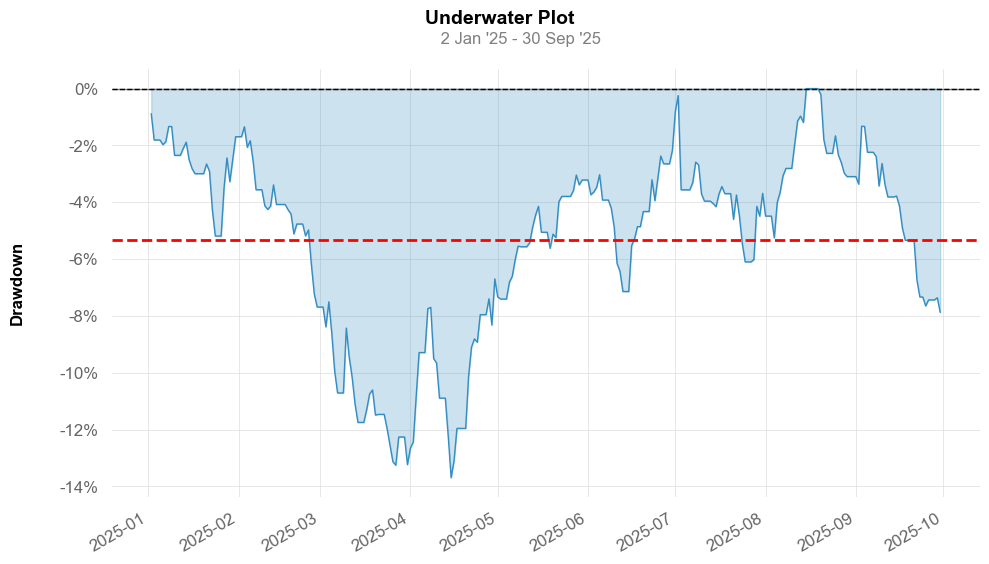

In [43]:
qs.plots.drawdown(returns_strategy, figsize=(10, 6))

# Exercise 6.2

* Calculate the gross and net SR for a strategy based on two moving medians
* Calculate and plot the maximum drawdown on the chart

In [44]:
mySR(x = dataUSA_KO_PEP['pnl_gross2b_mom'],
     scale = 252 * TradingMinsInDay)

np.float64(0.6005723496479998)

In [45]:
mySR(dataUSA_KO_PEP['pnl_net2b_mom'],
     scale = 252 * TradingMinsInDay)

np.float64(-57.09858003846228)

In [46]:
returns_strategy = summary_AAPL_daily['pnl_gross2b_mom_pct'].dropna()

In [47]:
qs.stats.max_drawdown(returns_strategy)

-0.1449377080577483

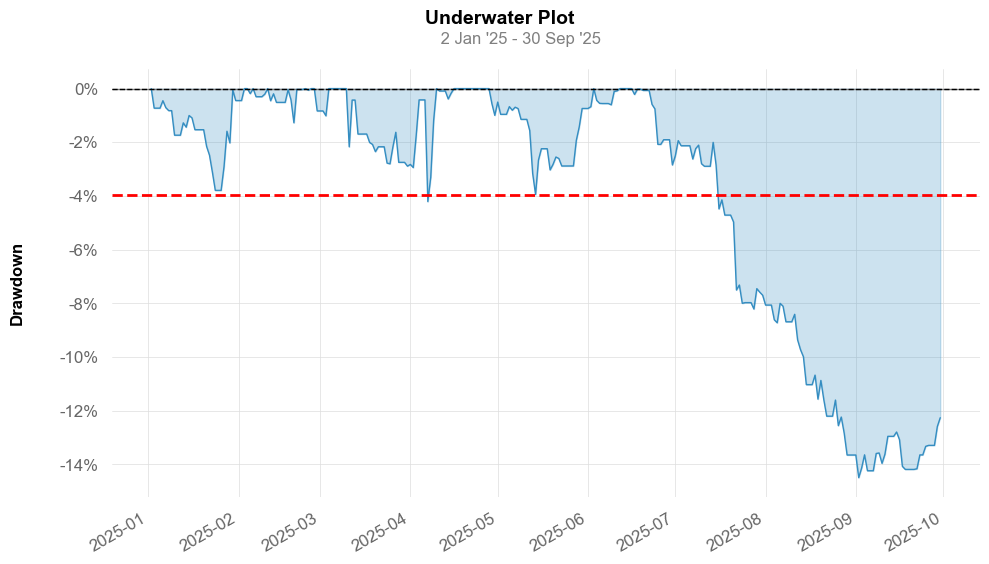

In [48]:
qs.plots.drawdown(returns_strategy, figsize=(10, 6))

# Exercise 6.3

* Calculate the gross and net SR for a strategy based on the volatility breakout model
* Calculate and plot the maximum drawdown on the chart

In [36]:
mySR(x = dataUSA_KO_PEP['pnl_gross_vb'],
     scale = 252 * TradingMinsInDay)

np.float64(-0.12281817218972964)

In [37]:
mySR(dataUSA_KO_PEP['pnl_net_vb'],
     scale = 252 * TradingMinsInDay)

np.float64(-138.47018621662562)

In [49]:
returns_strategy = summary_AAPL_daily['pnl_gross_vb_pct'].dropna()

In [50]:
qs.stats.max_drawdown(returns_strategy)

-0.04748656993178335

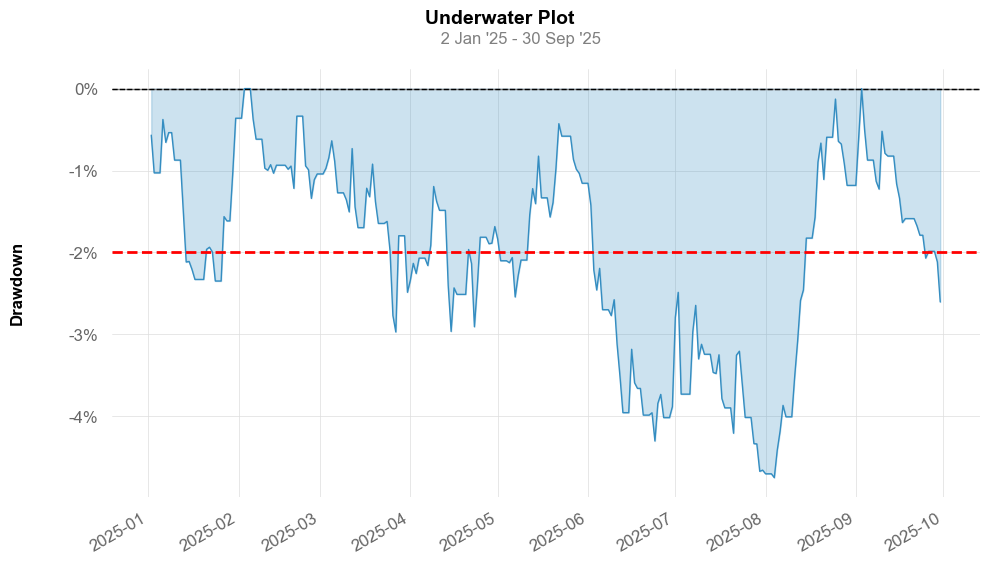

In [51]:
qs.plots.drawdown(returns_strategy, figsize=(10, 6))